In [1]:
from joblib import Parallel, delayed  
from tqdm import tqdm
from math import sqrt

In [5]:
result = Parallel(n_jobs=4)(delayed(sqrt)(i ** 2) for i in tqdm(range(10000000)))

100%|██████████| 10000000/10000000 [00:43<00:00, 228594.17it/s]


In [6]:
result = Parallel(n_jobs=2)(delayed(sqrt)(i ** 2) for i in tqdm(range(10000000)))

100%|██████████| 10000000/10000000 [00:54<00:00, 184047.15it/s]


In [ ]:
result = Parallel(n_jobs=1)(delayed(sqrt)(i ** 2) for i in tqdm(range(10000000)))

100%|██████████| 10000000/10000000 [04:16<00:00, 39022.53it/s]


In [29]:
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
import scipy as sp

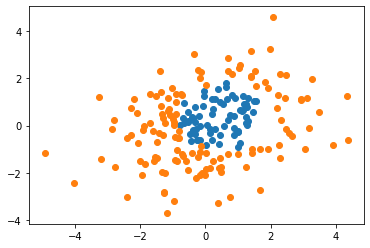

In [58]:
X = np.random.multivariate_normal([0, 0], [[2, 0.5], [0.5, 2]], 200)
label = (X[:, 0] - 0.5) ** 2 + (X[:, 1] - 0.4) ** 2 < 2
plt.scatter(X[label, 0], X[label, 1])
plt.scatter(X[~label, 0], X[~label, 1])

In [59]:
d = sp.spatial.distance.squareform(sp.spatial.distance.pdist(X))
d

array([[0.        , 1.29096734, 3.39570188, ..., 1.54790849, 1.41687679,
        1.41306133],
       [1.29096734, 0.        , 4.68665001, ..., 0.50224738, 1.56694194,
        1.76060492],
       [3.39570188, 4.68665001, 0.        , ..., 4.89587022, 4.09906938,
        3.88210839],
       ...,
       [1.54790849, 0.50224738, 4.89587022, ..., 0.        , 1.32757988,
        1.56348594],
       [1.41687679, 1.56694194, 4.09906938, ..., 1.32757988, 0.        ,
        0.26080735],
       [1.41306133, 1.76060492, 3.88210839, ..., 1.56348594, 0.26080735,
        0.        ]])

In [60]:
new_d = d.copy()
new_d[label, label] = 0

In [61]:
new_d[label, label]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [62]:
new_X = manifold.MDS(metric=True, n_components=2, dissimilarity="precomputed").fit_transform(new_d)

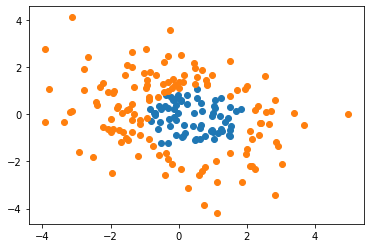

In [63]:
plt.scatter(new_X[label, 0], new_X[label, 1])
plt.scatter(new_X[~label, 0], new_X[~label, 1])